# HW5 Artificial Artificial Intelligence

Kendra Osburn | 11-2-19 | IST 736

## INTRODUCTION

### ARTIFICIAL INTELLIGENCE

At the nexus of machines and humans is the hard-to-grasp, even-harder-to-quantify blanket term “artificial intelligence.” Once a Hollywood blockbuster starring Haley Joel Osment, artificial intelligence is now a Silicon Valley buzzword, like Bitcoin or blockchain, used to excite stakeholders and increase valuations. 

In reality, artificial intelligence is considerably less glamorous. Artificial intelligence refers to the application of computing power to a wide variety of tasks that are too tedious for humans, susceptible to human error, or both. 
For example, let’s imagine that we want to know how the country feels about the President of the United States. In the olden days, before innovations like mass communication, computers and the internet, we’d have to walk door to door, ring the doorbell, interview the inhabitants, take notes, and return to our university, where we would manually sift through notes to pull out words that might seem more “positive” or “negative” in nature. While this might be manageable across a city block or housing subdivision, on a larger scale, it’s nearly impossible. 

Even if we could magically snap our fingers and receive one sentence about the President from each person in the United States, we would have over 300 million sentences to review. Moreover, even we could review and categorize each sentence in under a second, it would take us over 9 years of around-the-clock work to complete this task — and by then, we’d have a different president! 

Computers, on the other hand, are much better at these kinds of menial tasks — especially those that involve counting. Computers are also very good at performing mathematical equations quickly and efficiently, with numbers too large even for our confusingly expensive Texas Instruments calculators. By leveraging these machine skills in service of a more nuanced or complex objective — for instance, assessing people’s feelings — artificial intelligence can train computers to do even more amazing things. 


### ARTIFICIAL ARTIFICIAL INTELLIGENCE

What happens when we come across a task a human still can perform better than a machine? What happens when this task involves detecting lies or identifying sarcasm, where our reasoning is difficult to articulate or quantify beyond a “gut feeling”? How do we measure “gut feeling,” and how can we train a computer on something so nebulous? 

Enter Amazon and its Mechanical Turk program. Touted as “artificial” artificial intelligence, Amazon Mechanical Turk (AMT) farms out tasks that involve “gut feeling” to hundreds of thousands of human workers (called “turkers”) a small sum. Amazon’s objective is to collect turkers’ data with the goal of automating them out of existence. Until that day arrives, however, the turkers at AMT are here to help those of us unfortunate enough to conduct a research project with unlabeled data. 


## ANALYSIS & MODELS

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

neg = pd.read_csv('AMT_neg.csv')
pos = pd.read_csv('AMT_pos.csv')

### ABOUT THE DATA
#### Initial EDA

In [43]:
from tabulate import tabulate
df = neg.copy()
df = df[['WorkerId', 'Answer.sentiment.label']]
print(tabulate(df[:5], tablefmt="rst", headers=df.columns))

====  ==============  ========================
  ..  WorkerId        Answer.sentiment.label
====  ==============  ========================
   0  A100DH6ZVHB9EP  Neutral
   1  AOMFEAWQHU3D8   Negative
   2  A3HAEQW13YPT6A  Positive
   3  A3NAHG3TXPNQFN  Negative
   4  A1X9BD3KDIA2QB  Negative
====  ==============  ========================


### How many unique turkers worked on each dataframe?

In [44]:
def get_unique(df, column):
    unique = np.unique(df[column], return_counts=True)
    df = pd.DataFrame(zip(unique[0], unique[1]))
    return len(unique[0]), unique, df

num_neg, unique_neg, u_neg_df = get_unique(neg, 'WorkerId')    
num_pos, unique_pos, u_pos_df = get_unique(pos, 'WorkerId')

print(num_neg, 'Turkers worked on NEG batch')
print(num_pos, 'Turkers worked on POS batch')

53 Turkers worked on NEG batch
38 Turkers worked on POS batch


### How many HITS did each unique turker do?

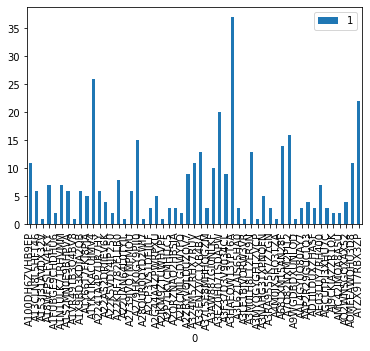

In [45]:
u_neg_df.plot(kind='bar',x=0,y=1)

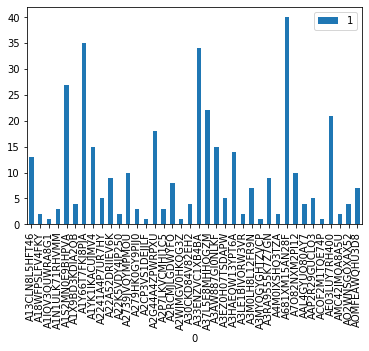

In [46]:
u_pos_df.plot(kind='bar',x=0,y=1)

### What's the `max` and `min` HIT for unique turkers

In [47]:
print('For {}, the min was: {} and the max was: {}'.format('neg', unique_neg[1].min(), unique_neg[1].max())) 
print('For {}, the min was: {} and the max was: {}'.format('pos', unique_pos[1].min(), unique_pos[1].max())) 

For neg, the min was: 1 and the max was: 37
For pos, the min was: 1 and the max was: 40


### Did a specitic Sentiment take longer for turkers to assess? 

Text(0.5, 1, 'Negative')

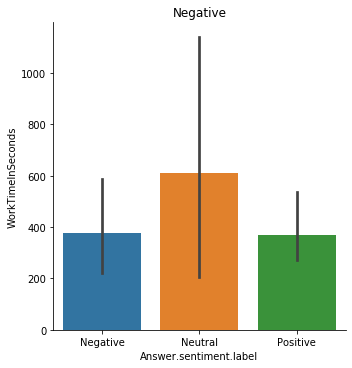

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Answer.sentiment.label", 
            y="WorkTimeInSeconds", 
            kind="bar", 
            order=['Negative', 'Neutral', 'Positive'], 
            data=neg);
plt.title('Negative')

Text(0.5, 1, 'Positive')

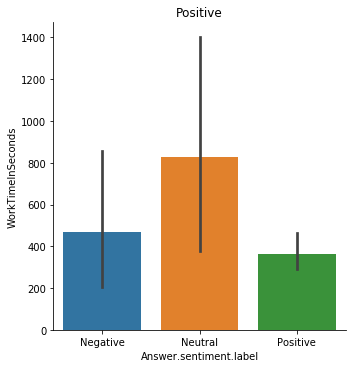

In [49]:
sns.catplot(x="Answer.sentiment.label", 
            y="WorkTimeInSeconds", 
            kind="bar", 
            order=['Negative', 'Neutral', 'Positive'], 
            data=pos)
plt.title('Positive')

### How many turkers had less than 10 second response time?

In [50]:
response_time = neg[neg['WorkTimeInSeconds'] < 10]
response_time_check = neg[neg['WorkTimeInSeconds'] > 10]

In [51]:
len(response_time)

48

In [52]:
len(response_time_check)

312

### Checking for potential bots

#### Did anyone have a consistent average low response time?

In [58]:
count = pos.groupby(['WorkerId'])['HITId'].count()
work_time = pos.groupby(['WorkerId'])['WorkTimeInSeconds'].mean()
new_df = pd.DataFrame([work_time, count]).T
new_df.reset_index(inplace=True)

df = new_df.copy()
df = df[['WorkerId', 'WorkTimeInSeconds', 'HITId']]
print(tabulate(df[:5], tablefmt="rst", headers=df.columns))

====  ==============  ===================  =======
  ..  WorkerId          WorkTimeInSeconds    HITId
====  ==============  ===================  =======
   0  A13CLN8L5HFT46              7.23077       13
   1  A18WFPSLFV4FKY             47              2
   2  A1IQV3QUWRA8G1             22              1
   3  A1N1ULK71RHVMM             10              3
   4  A1S2MN0E9BHPVA            173.444         27
====  ==============  ===================  =======


#### Did anyone have a consistent average high response time?

In [62]:
new_df['WorkTimeInMin'] = new_df['WorkTimeInSeconds']/60

df = new_df.copy()
df = df.sort_values(by='WorkTimeInMin', ascending=False)
df = df[['WorkerId', 'WorkTimeInMin', 'HITId']]
print(tabulate(df[:5], tablefmt="rst", headers=df.columns))

====  ==============  ===============  =======
  ..  WorkerId          WorkTimeInMin    HITId
====  ==============  ===============  =======
  36  AO2WNSGOXAX52          150.833         4
  15  A2P7LKVCMHI1C5          83.2833        3
  24  A3LE1BIVORW3VR          81.975         2
  30  A7O82NXM2PI12           18.5883       10
  25  A3M0LH8L12FR9N          17.131         7
====  ==============  ===============  =======


In [74]:
count = pd.DataFrame(pos.groupby(['WorkerId', 'Answer.sentiment.label'])['HITId'].count())

df = count.copy()
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

==============================  =======
..                                HITId
==============================  =======
('A13CLN8L5HFT46', 'Neutral')         2
('A13CLN8L5HFT46', 'Positive')       11
('A18WFPSLFV4FKY', 'Positive')        2
('A1IQV3QUWRA8G1', 'Positive')        1
('A1N1ULK71RHVMM', 'Negative')        1
('A1N1ULK71RHVMM', 'Positive')        2
('A1S2MN0E9BHPVA', 'Negative')        4
('A1S2MN0E9BHPVA', 'Neutral')         2
('A1S2MN0E9BHPVA', 'Positive')       21
('A1X9BD3KDIA2QB', 'Neutral')         1
==============================  =======


#### Did anyone answer ONLY pos/neg/neutral?

In [76]:
pnn = pd.DataFrame()
pnn['Neutral'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Neutral').sum())
pnn['Positive'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Positive').sum())
pnn['Negative'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: (x=='Negative').sum())
pnn['Total'] = pos.groupby('WorkerId')['Answer.sentiment.label'].apply(lambda x: x.count())

df = pnn.copy()
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

==============  =========  ==========  ==========  =======
..                Neutral    Positive    Negative    Total
==============  =========  ==========  ==========  =======
A13CLN8L5HFT46          2          11           0       13
A18WFPSLFV4FKY          0           2           0        2
A1IQV3QUWRA8G1          0           1           0        1
A1N1ULK71RHVMM          0           2           1        3
A1S2MN0E9BHPVA          2          21           4       27
A1X9BD3KDIA2QB          1           3           0        4
A1Y66T7FKJ8PJA          5          23           7       35
A1YK1IKACUJMV4          0          15           0       15
A2241A4P7UR7HY          2           2           1        5
A22A52DRIIEV6K          3           6           0        9
==============  =========  ==========  ==========  =======


#### This is getting a little confusing, let's just look at our top performers

In [78]:
top = pnn.sort_values(by=['Total'], ascending=False)

In [79]:
df = top.copy()
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

==============  =========  ==========  ==========  =======
..                Neutral    Positive    Negative    Total
==============  =========  ==========  ==========  =======
A681XM15AN28F          13          20           7       40
A1Y66T7FKJ8PJA          5          23           7       35
A33ENZVC1XB4BA          0          34           0       34
A1S2MN0E9BHPVA          2          21           4       27
A37L5E8MHHQGZM          6          13           3       22
AE03LUY7RH400           4          10           7       21
A2G44A4ZPWRPXU          4          12           2       18
A1YK1IKACUJMV4          0          15           0       15
A3AW887GI0NLKF          3          10           2       15
A3HAEQW13YPT6A          0          14           0       14
==============  =========  ==========  ==========  =======


Interesting!! Looking from here, we have three workers who ONLY chose positive. 

Let's look at their response time to see if we can determine if they are a bot!!

In [80]:
top['Avg_WorkTimeInSeconds'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.mean())
top['Avg_WorkTimeInMin'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.mean()/60)
top['Min_WorkTimeInMin'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.min()/60)
top['Max_WorkTimeInMin'] = pos.groupby('WorkerId')['WorkTimeInSeconds'].apply(lambda x: x.max()/60)

In [91]:
df = top.copy()
df.reset_index(inplace=True)
df = df[['WorkerId', 'Neutral', 'Positive','Negative','Avg_WorkTimeInMin']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==============  =========  ==========  ==========  ===================
  ..  WorkerId          Neutral    Positive    Negative    Avg_WorkTimeInMin
====  ==============  =========  ==========  ==========  ===================
   0  A681XM15AN28F          13          20           7              0.22625
   1  A1Y66T7FKJ8PJA          5          23           7             11.5976
   2  A33ENZVC1XB4BA          0          34           0              6.11078
   3  A1S2MN0E9BHPVA          2          21           4              2.89074
   4  A37L5E8MHHQGZM          6          13           3              5.77121
   5  AE03LUY7RH400           4          10           7              1.70397
   6  A2G44A4ZPWRPXU          4          12           2              3.68796
   7  A1YK1IKACUJMV4          0          15           0              9.89333
   8  A3AW887GI0NLKF          3          10           2              4.49
   9  A3HAEQW13YPT6A          0          14           0              7.38214
===

Even more interesting! These two don't appear to be bots, based on our current metric which is time variability.

HOWEVER, worker `A681XM15AN28F` appears to only work for an average of 13 seconds per review which doesn't seem like enough time to read and judge a review...

## PART 2: Second submission to AMT

TOO MANY REVIEWERS!

Here is when we realized that doing a kappa score with over 30 individual reviewers would be tricky, so we rusubmitted to AMT and required the turkers to be 'Master' in the hopes that this additional barrier-to-entry would help reduce the amount of turkers working on the project

In [92]:
v2 = pd.read_csv('HW5_amt_v2.csv')
v2[:5]
len(v2)

293

This time, I didn't separate the df into pos and neg before submitting to AMT, so we have to reimport the labels.

In [86]:
labels = pd.read_csv('all_JK_extremes_labeled.csv')

In [87]:
len(labels)

98

Oops! That's right, we replicated each review * 3 so three separate people could look at each review

In [93]:
labels2 = labels.append([labels] * 2, ignore_index=True)

In [94]:
len(labels2)

294

#### Reuploading now -- WITH BETTER CODE AND BETTER VARIABLE NAMES!

In [97]:
turker = pd.read_csv('HW5_amt_294.csv')

df = turker.copy()
df.reset_index(inplace=True)
df = df[['WorkerId', 'Answer.sentiment.label']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==============  ========================
  ..  WorkerId        Answer.sentiment.label
====  ==============  ========================
   0  AH5A86OLRZWCS   Negative
   1  A2HGRSPR50ENHL  Negative
   2  AKSJ3C5O3V9RB   Negative
   3  ARLGZWN6W91WD   Negative
   4  AKSJ3C5O3V9RB   Negative
   5  A1L8RL58MYU4NC  Negative
   6  A3EZ0H07TSDAPW  Positive
   7  ASB8T0H7L99RF   Negative
   8  A38DC3BG1ZCVZ2  Negative
   9  A2XFO0X6RCS98M  Negative
====  ==============  ========================


In [107]:
# Getting labels...
labels = pd.read_csv('all_JK_extremes_labeled.csv')
# X3
labels = labels.append([labels] * 2, ignore_index=True)
print(len(labels))
df = labels.copy()
df['short'] = df.apply(lambda x: x['0'].split(' ')[:5], axis=1)

df = df[['PoN', 'short']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

294
====  =====  ========================================================
  ..  PoN    short
====  =====  ========================================================
   0  N      ['', 'Everyone', 'praised', 'an', 'overrated']
   1  N      ['', 'What', 'idiotic', 'FIlm\nI', 'can']
   2  N      ['', 'Terrible\nThe', 'only', 'thing', 'good']
   3  N      ['', 'Watch', 'Taxi', 'Driver', 'instead\nThis']
   4  N      ['', 'I', 'learned', 'one', 'thing.\nIt']
   5  N      ['', 'What', 'the', 'hell\nI', 'HATE']
   6  N      ['', "Don't", 'be', 'SHEEP\nI', "don't"]
   7  N      ['', 'So', 'dissapointing', 'and', 'boring!!!\nJoaquin']
   8  N      ['', 'Dark,', 'Depressing,', 'Slow,', 'Heavy,']
   9  N      ['', 'What', 'happens', 'when', 'a']
====  =====  ========================================================


#### NOW, TO SORT!

In [108]:
sorted_labels = labels.sort_values(by=['0'])
sorted_turker = turker.sort_values(by=['Input.text'])

In [109]:
# sorted_turker['Input.text'][:5]

OMG HOORAY HOORAY HOORAY!!



NOTE: FUN FACT!! I can type here and then hit the `esc` key to turn this cell into markdown!!

In [116]:
# YUCK THIS IS SO AGGRIVATING!! This line below doens't work because it still uses indexes.
# So the P and N didn't match up 
# sorted_turker['PoN'] = sorted_labels['PoN']
sorted_turker['PoN'] = sorted_labels['PoN'].tolist()
df = sorted_turker[sorted_turker.columns[-5:]][:10]

df['short'] = df.apply(lambda x: x['Input.text'].split(' ')[1:3], axis=1)


df = df[['short', 'Answer.sentiment.label', 'PoN']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  =======================================  ========================  =====
  ..  short                                    Answer.sentiment.label    PoN
====  =======================================  ========================  =====
 228  ['#LetRottenTomatoesRotSquad\nI', 'am']  Positive                  P
 229  ['#LetRottenTomatoesRotSquad\nI', 'am']  Positive                  P
 230  ['#LetRottenTomatoesRotSquad\nI', 'am']  Positive                  P
  56  ['A', "'Triumph"]                        Negative                  N
  55  ['A', "'Triumph"]                        Negative                  N
  54  ['A', "'Triumph"]                        Neutral                   N
 223  ['A', 'Breath']                          Positive                  P
 222  ['A', 'Breath']                          Positive                  P
 224  ['A', 'Breath']                          Positive                  P
  46  ['A', 'MASTERPIECE\nJoaquin']            Positive                  N
====  =========

## PART 3: ANALYZE

First, let's clean ALL the things

In [118]:
all_df = sorted_turker[['Input.text', 'WorkerId', 'Answer.sentiment.label', 'PoN']]

In [121]:
df = all_df.copy()
df = df[['WorkerId', 'Answer.sentiment.label', 'PoN']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==============  ========================  =====
  ..  WorkerId        Answer.sentiment.label    PoN
====  ==============  ========================  =====
 228  A681XM15AN28F   Positive                  P
 229  A2XFO0X6RCS98M  Positive                  P
 230  AURYD2FH3FUOQ   Positive                  P
  56  A1T79J0XQXDDGC  Negative                  N
  55  A2XFO0X6RCS98M  Negative                  N
  54  A681XM15AN28F   Neutral                   N
 223  ARLGZWN6W91WD   Positive                  P
 222  ASB8T0H7L99RF   Positive                  P
 224  A1T79J0XQXDDGC  Positive                  P
  46  A1T79J0XQXDDGC  Positive                  N
====  ==============  ========================  =====


In [122]:
all_df_all = all_df.copy()
all_df_all['APoN'] = all_df_all.apply(lambda x: x['Answer.sentiment.label'][0], axis=1)

In [123]:
all_df_all['agree'] = all_df_all.apply(lambda x: x['PoN'] == x['APoN'], axis=1)

In [126]:

df = all_df_all[-10:].copy()
df = df[['WorkerId', 'PoN', 'APoN', 'agree']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==============  =====  ======  =======
  ..  WorkerId        PoN    APoN    agree
====  ==============  =====  ======  =======
  38  A3EZ0H07TSDAPW  N      N       True
 216  A3EZ0H07TSDAPW  N      P       False
 217  A2XFO0X6RCS98M  N      P       False
 218  AKSJ3C5O3V9RB   N      P       False
 264  A3EZ0H07TSDAPW  N      P       False
 265  ARLGZWN6W91WD   N      P       False
 266  A38DC3BG1ZCVZ2  N      P       False
  93  A2XFO0X6RCS98M  N      N       True
  94  A3EZ0H07TSDAPW  N      N       True
  95  ASB8T0H7L99RF   N      N       True
====  ==============  =====  ======  =======


### Lets see how many agree!

In [127]:
agree_df = pd.DataFrame(all_df_all.groupby(['Input.text','PoN'])['agree'].mean())
agree_df = agree_df.reset_index()
df = agree_df.copy()
df = df[['PoN', 'agree']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  =====  ========
  ..  PoN       agree
====  =====  ========
   0  P      1
   1  N      1
   2  P      1
   3  N      0.333333
   4  P      1
   5  P      1
   6  P      1
   7  P      1
   8  N      0
   9  P      0.666667
====  =====  ========


OK so this actually gave us something we want...
BUT PLEASE TELL ME THE BETTER WAY!!

In [128]:
def return_agreement(num):
    if num == 0:
        return 'agree_wrong'
    if num == 1:
        return 'agree'
    if (num/1) !=0:
        return 'disparity'

agree_df['agree_factor'] = agree_df.apply(lambda x: return_agreement(x['agree']), axis=1)
agree_df

df = agree_df.copy()
df = df[['PoN', 'agree', 'agree_factor']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  =====  ========  ==============
  ..  PoN       agree  agree_factor
====  =====  ========  ==============
   0  P      1         agree
   1  N      1         agree
   2  P      1         agree
   3  N      0.333333  disparity
   4  P      1         agree
   5  P      1         agree
   6  P      1         agree
   7  P      1         agree
   8  N      0         agree_wrong
   9  P      0.666667  disparity
====  =====  ========  ==============


In [129]:
df1 = agree_df.groupby(['agree_factor']).count()
df1.reset_index(inplace=True)
df = df1.copy()
df = df[['agree_factor','Input.text','PoN', 'agree']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==============  ============  =====  =======
  ..  agree_factor      Input.text    PoN    agree
====  ==============  ============  =====  =======
   0  agree                     33     33       33
   1  agree_wrong               31     31       31
   2  disparity                 34     34       34
====  ==============  ============  =====  =======


Text(0.5, 1.0, 'How many turkers agreed on sentiment?')

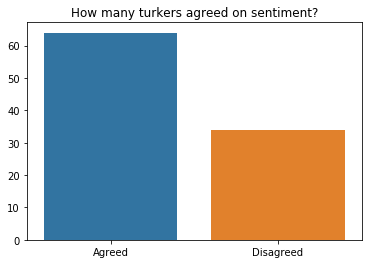

In [130]:
sns.barplot(x=['Agreed', 'Disagreed'],
           y= [64,34],
           data = df1);
plt.title('How many turkers agreed on sentiment?')

Text(0.5, 1.0, 'How many turkers agreed on sentiment, but were wrong?')

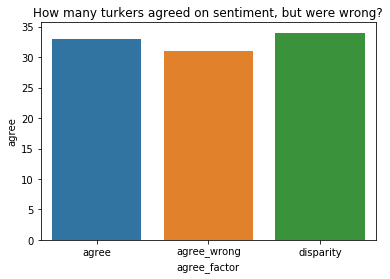

In [131]:
sns.barplot(x="agree_factor", y="agree", data=df1);
plt.title('How many turkers agreed on sentiment, but were wrong?')

In [132]:
df2 = agree_df.groupby(['agree_factor', 'PoN']).count()
df2.reset_index(inplace=True)

Text(0.5, 1.0, 'What was the pos/neg split for the turkers?')

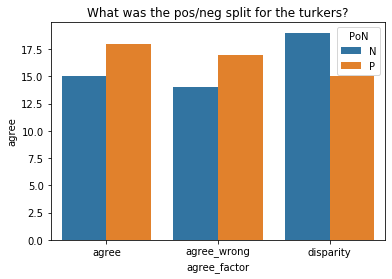

In [133]:
sns.barplot(x="agree_factor",
           y="agree",
           hue="PoN",
           data=df2);
plt.title("What was the pos/neg split for the turkers?")

## What was the kappa score for the turkers?

In [134]:
# Example code
from sklearn.metrics import cohen_kappa_score
y1 = [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]
y2 = [0,1,2,2,4,1,2,3,0,0,0,2,2,4,4]
cohen_kappa_score(y1,y2)

0.33333333333333337

### This was absolutely miserable and had me questioning both my intellect and the meaning of life

FIRST PASS: Oh boy! This will be super fun. First, I'm going to brainstorm "out loud" how I'm going to do this when AMT doesn't require that the same N turkers complete the task, making inter-rater reliability extremely hard to track when one turker has done 46/98 reviews and another has done 2/98

Let's look at our top turkers

In [136]:
turker_clean = turker[['HITId', 'WorkerId', 'Answer.sentiment.label', 'Input.text']]

In [137]:
turker_clean

df = turker_clean.copy()
df = df[['HITId','WorkerId', 'Answer.sentiment.label']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==============================  ==============  ========================
  ..  HITId                           WorkerId        Answer.sentiment.label
====  ==============================  ==============  ========================
   0  338GLSUI43BXEPY2ES6SPI72KKESF7  AH5A86OLRZWCS   Negative
   1  338GLSUI43BXEPY2ES6SPI72KKESF7  A2HGRSPR50ENHL  Negative
   2  338GLSUI43BXEPY2ES6SPI72KKESF7  AKSJ3C5O3V9RB   Negative
   3  37MQ8Z1JQEWA9HYZP3JANL1ES162YC  ARLGZWN6W91WD   Negative
   4  37MQ8Z1JQEWA9HYZP3JANL1ES162YC  AKSJ3C5O3V9RB   Negative
   5  37MQ8Z1JQEWA9HYZP3JANL1ES162YC  A1L8RL58MYU4NC  Negative
   6  38O9DZ0A62N8QXOTJKOI4UHLTRD62G  A3EZ0H07TSDAPW  Positive
   7  38O9DZ0A62N8QXOTJKOI4UHLTRD62G  ASB8T0H7L99RF   Negative
   8  38O9DZ0A62N8QXOTJKOI4UHLTRD62G  A38DC3BG1ZCVZ2  Negative
   9  3I7SHAD35MWH116RCCCUPHVFU7E7M7  A2XFO0X6RCS98M  Negative
====  ==============================  ==============  ========================


And let's see how many turkers turked

In [143]:
turker_counts = pd.DataFrame(turker_clean.WorkerId.value_counts())

df = turker_counts.copy()
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

==============  ==========
..                WorkerId
==============  ==========
ARLGZWN6W91WD           46
A681XM15AN28F           37
A1T79J0XQXDDGC          34
A2XFO0X6RCS98M          33
A3EZ0H07TSDAPW          33
A1L8RL58MYU4NC          28
A38DC3BG1ZCVZ2          22
AKSJ3C5O3V9RB           21
ASB8T0H7L99RF           10
AE03LUY7RH400            6
==============  ==========


OK let's make this easy on ourselves and just use the top 5 turkers for our first test


In [151]:
turker1 = turker_clean[turker_clean['WorkerId'] == 'ARLGZWN6W91WD']
turker2 = turker_clean[turker_clean['WorkerId'] == 'A681XM15AN28F']
turker3 = turker_clean[turker_clean['WorkerId'] == 'A1T79J0XQXDDGC']
turker4 = turker_clean[turker_clean['WorkerId'] == 'A2XFO0X6RCS98M']
turker5 = turker_clean[turker_clean['WorkerId'] == 'A3EZ0H07TSDAPW']

In [152]:
turker1.reset_index(drop=True, inplace=True)
turker2.reset_index(drop=True, inplace=True)
turker3.reset_index(drop=True, inplace=True)
turker4.reset_index(drop=True, inplace=True)
turker5.reset_index(drop=True, inplace=True)

In [153]:
merged_df = pd.concat([turker1, turker2, turker3, turker4, turker5], axis=0, sort=False)

In [154]:
merged_df.reset_index(drop=True, inplace=True)

In [157]:
df = merged_df.sort_values(by='WorkerId')
df = df[['WorkerId', 'Answer.sentiment.label']]
print(tabulate(df[:20], tablefmt="rst", headers=df.columns))

====  ==============  ========================
  ..  WorkerId        Answer.sentiment.label
====  ==============  ========================
  91  A1T79J0XQXDDGC  Negative
 115  A1T79J0XQXDDGC  Positive
 114  A1T79J0XQXDDGC  Positive
 113  A1T79J0XQXDDGC  Positive
 112  A1T79J0XQXDDGC  Negative
 111  A1T79J0XQXDDGC  Positive
 110  A1T79J0XQXDDGC  Positive
 109  A1T79J0XQXDDGC  Positive
 108  A1T79J0XQXDDGC  Positive
 107  A1T79J0XQXDDGC  Positive
 106  A1T79J0XQXDDGC  Positive
 105  A1T79J0XQXDDGC  Positive
 104  A1T79J0XQXDDGC  Positive
 103  A1T79J0XQXDDGC  Positive
 102  A1T79J0XQXDDGC  Positive
 116  A1T79J0XQXDDGC  Positive
 101  A1T79J0XQXDDGC  Positive
  99  A1T79J0XQXDDGC  Positive
  83  A1T79J0XQXDDGC  Positive
  84  A1T79J0XQXDDGC  Negative
====  ==============  ========================


In [172]:
merged_df2 = pd.concat([turker1, turker2], axis=0, sort=False)
df = pd.DataFrame({'Turker': merged_df['WorkerId'].tolist(),
                   'SENTIMENT': merged_df['Answer.sentiment.label'].tolist(),
                   'REVIEW': merged_df['HITId'].tolist() })

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'SENTIMENT{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)

df = result_df.T.copy()
df = df[df.columns[1:4]]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

===========  ================  ================  ===============
..           A2XFO0X6RCS98M    A3EZ0H07TSDAPW    A681XM15AN28F
===========  ================  ================  ===============
SENTIMENT1   Negative          Positive          Negative
SENTIMENT2   Negative          Neutral           Positive
SENTIMENT3   Negative          Positive          Positive
SENTIMENT4   Negative          Negative          Positive
SENTIMENT5   Positive          Negative          Positive
SENTIMENT6   Negative          Positive          Negative
SENTIMENT7   Negative          Negative          Neutral
SENTIMENT8   Negative          Positive          Neutral
SENTIMENT9   Negative          Positive          Neutral
SENTIMENT10  Negative          Negative          Neutral
===========  ================  ================  ===============


In [173]:
t1 = result_df.T['A3EZ0H07TSDAPW'].tolist()
t2 = result_df.T['A2XFO0X6RCS98M'].tolist()
t3 = result_df.T['A681XM15AN28F'].tolist()
t4 = result_df.T['ARLGZWN6W91WD'].tolist()
t1[:-1][:5]

['Positive', 'Neutral', 'Positive', 'Negative', 'Negative']

In [174]:
t2[:-1][:5]

['Negative', 'Negative', 'Negative', 'Negative', 'Positive']

In [175]:
t3[:5]

['Negative', 'Positive', 'Positive', 'Positive', 'Positive']

OK after all that work, we can finally calculate the kappa score between our first and second "most prolific" turkers

In [176]:
from sklearn.metrics import cohen_kappa_score
y1 = t1[:-1]
y2 = t2[:-1]
cohen_kappa_score(y1,y2)

0.43974358974358974

annnnnd just to make sure, let's calculate the same score between third and fourth "most prolific" turkers

In [177]:
y3 = t3[:-1]
y4 = t4[:-1]
cohen_kappa_score(y3,y4)

-0.07585335018963324

Pretty sure a negative number isn't what we want... oh well. Can't worry about that because that's when the existential dread sinks in... like, why am I doing this right now? Why do I care so much? Why am I trying to calculate inter-rater reliability THIS way when this won't even be a measure I will use if/when I use turkers in the future? In the future, I will use the sample size itself to determine "reliability" -- e.g. If all N turkers agree on X, then it goes into the "good" pile, if not, then it goes back into the AMT pile until we have N turkers agreeing...Because the way AMT is set up right now, we won't be able to reliable calculate kappa when the number of HITS per turker is so varried. In order to get something truely accurate, I'd have to remove all the data that was only completed by M or fewer turkers and hope that the prolific turkers worked on the same ones and then compare those (which is exactly what I did below but seriously WHY WHY WHY.)

#### Another failed test

#### Attempt 4:
##### Maybe if I convert these huge opressive strings into smaller numbers, this won't feel as awful?

In [179]:
new_turker_ids = pd.factorize(turker_clean_test['WorkerId'].tolist())

In [180]:
t_ids = ['T_' + str(id) for id in new_turker_ids[0]]

In [181]:
t_ids[:5]

['T_0', 'T_1', 'T_2', 'T_3', 'T_2']

In [183]:
turker_clean_test['T_ID'] = t_ids
# turker_clean_test[:5]

In [184]:
turker_clean_test['sentiment'] = turker_clean_test.apply(lambda x: x['Answer.sentiment.label'][0], axis=1)

In [185]:
# turker_clean_test[:5]

Annnnd here we are... small and clean. This DID actually help my brain a bit... Noted for next time.

In [186]:
even_cleaner_df = turker_clean_test[['ReviewID', 'T_ID', 'sentiment']]

In [190]:
df = even_cleaner_df[:5]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==========  ======  ===========
  ..    ReviewID  T_ID    sentiment
====  ==========  ======  ===========
   0           0  T_0     N
   1           0  T_1     N
   2           0  T_2     N
   3           1  T_3     N
   4           1  T_2     N
====  ==========  ======  ===========


#### Attempt 5:
#### Let's make our very own DIY sparse matrix!!

In [193]:
df = pd.DataFrame({'Turker': even_cleaner_df['T_ID'].tolist(),
                   'SENTIMENT': even_cleaner_df['sentiment'].tolist(),
                   'REVIEW': even_cleaner_df['ReviewID'].tolist() })

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'REVIEW{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)

df = result_df.T[:5]
df = df[df.columns[1:8]]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

=======  =====  ======  ======  ======  ======  ======  ======
..       T_1    T_10    T_11    T_12    T_13    T_14    T_15
=======  =====  ======  ======  ======  ======  ======  ======
REVIEW1  N      P       N       N       N       N       N
REVIEW2  nan    N       N       N       N       P       N
REVIEW3  nan    P       P       N       N       nan     nan
REVIEW4  nan    P       P       N       P       nan     nan
REVIEW5  nan    N       N       P       P       nan     nan
=======  =====  ======  ======  ======  ======  ======  ======


And turn it into a data frame cuz why not?!

## That is obviously wrong because only THREE people commented on Review1

#### ATTEMPT FUCKING 6:
##### I ***clap emoji*** hate ***clap emoji*** everything ***clap emoji***

In [195]:
df = pd.DataFrame({'Turker': even_cleaner_df['T_ID'].tolist(),
                   'SENTIMENT': even_cleaner_df['ReviewID'].tolist(),
                   'REVIEW': even_cleaner_df['sentiment'].tolist() })

grouped = df.groupby('Turker')
values = grouped['REVIEW'].agg('sum')
id_df = grouped['SENTIMENT'].apply(lambda x: pd.Series(x.values)).unstack()
id_df = id_df.rename(columns={i: 'REVIEW{}'.format(i + 1) for i in range(id_df.shape[1])})
result = pd.concat([id_df, values], axis=1)
result_df = pd.DataFrame(result)
# print(result_df.T[:5])

In [196]:
df = pd.DataFrame(result_df.T)

In [198]:
# df[:5]

I want every review on the left side and I want all 46 turkers on the top

In [199]:
df = pd.DataFrame({ 'review': even_cleaner_df['ReviewID']})

### Attempt 7: After eating some food and having a calm down

In [208]:
def get_array_of_reviews(turker, df):
    a = ['nan']*98
    df = even_cleaner_df[even_cleaner_df['T_ID'] == turker] 
    t_reviews = df['ReviewID'].tolist()
    t_sentiment = df['sentiment'].tolist()
    for index,review in enumerate(t_reviews):
        a[review] = t_sentiment[index]
#     print(t_reviews)

    return a

sparse_df = even_cleaner_df.copy()
sparse_df['big_array'] = sparse_df.apply(lambda x: get_array_of_reviews(x['T_ID'], even_cleaner_df), axis=1)
t0 = even_cleaner_df[even_cleaner_df['T_ID'] == 'T_0']

In [211]:
df = t0
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))

====  ==========  ======  ===========
  ..    ReviewID  T_ID    sentiment
====  ==========  ======  ===========
   0           0  T_0     N
  34          11  T_0     N
 126          42  T_0     N
 140          46  T_0     N
====  ==========  ======  ===========


In [218]:

sparse_df['big_array_sm'] = sparse_df.apply(lambda x: x['big_array'][:5], axis=1)
df = sparse_df[['ReviewID', 'T_ID','sentiment', 'big_array_sm']]
print(tabulate(df[:10], tablefmt="rst", headers=df.columns))


====  ==========  ======  ===========  =================================
  ..    ReviewID  T_ID    sentiment    big_array_sm
====  ==========  ======  ===========  =================================
   0           0  T_0     N            ['N', 'nan', 'nan', 'nan', 'nan']
   1           0  T_1     N            ['N', 'nan', 'nan', 'nan', 'nan']
   2           0  T_2     N            ['N', 'N', 'nan', 'nan', 'nan']
   3           1  T_3     N            ['nan', 'N', 'nan', 'N', 'N']
   4           1  T_2     N            ['N', 'N', 'nan', 'nan', 'nan']
   5           1  T_4     N            ['nan', 'N', 'nan', 'nan', 'nan']
   6           2  T_5     P            ['nan', 'nan', 'P', 'N', 'P']
   7           2  T_6     N            ['nan', 'nan', 'N', 'nan', 'nan']
   8           2  T_7     N            ['nan', 'nan', 'N', 'nan', 'nan']
   9           3  T_8     N            ['nan', 'nan', 'nan', 'N', 'N']
====  ==========  ======  ===========  =================================


In [219]:
t0 = sparse_df[sparse_df['T_ID'] == 'T_0']

In [223]:
sparse_df['big_array'][sparse_df['T_ID'] == 'T_2'].tolist()[0][:5]

['N', 'N', 'nan', 'nan', 'nan']

## RESULTS
### Finally Calculate the Kappa

In [224]:
y1 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_0'].tolist()[0]
y2 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_1'].tolist()[0]
cohen_kappa_score(y1,y2)

0.39004149377593356

### And calculate kappas for other combinations (but not all combinations)

In [225]:
def calculate_kappa(num):
    y1 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_'+str(num)].tolist()[0]
    y2 = sparse_df['big_array'][sparse_df['T_ID'] == 'T_'+str(num + 1)].tolist()[0]
    return cohen_kappa_score(y1,y2)

kappas = [calculate_kappa(num) for num in range(16)]

In [226]:
kappas

[0.39004149377593356,
 0.07634307257304429,
 0.023255813953488413,
 0.11578947368421055,
 -0.10975609756097549,
 -0.04981253347616499,
 0.29547088425593093,
 -0.02821170435999054,
 -0.01071003570011908,
 0.005658536585365748,
 -0.06968933669185562,
 -0.04457364341085279,
 -0.04457364341085279,
 -0.02235469448584193,
 -0.015544041450777257,
 -0.01730103806228378]

##### Wonderful. More negative numbers. I love life. 

TL;DR: Calculating kappa and inter-rater reliability when there are multiple reviewers is challenging and deserves more delibrate time and study.

## CONCLUSION

While computers have advanced in leaps and bounds over the past several decades, it’s clear that there are tasks that humans still perform better than machines. We know, for instance, that horseradish doesn’t belong in brownie recipes. We can tell if a tweet is sarcastic, or identify whether a photo depicts a chihuahua or a muffin. Some might say that machines can’t perform these tasks reliably because they aren’t “smart enough” yet. If intelligence is defined as the sum total of everything we’ve ever learned, then this assessment is accurate.

However, this does not mean that machines will never be able to perform tasks like these. In reality, computers simply haven't been given enough data to determine that the blueberries in that muffin are not, in fact, chihuahua eyeballs. Just as a small child labels every four-legged creature a “doggie” until she has lived long enough to collect more data (“This four-legged creature is always bigger than a dog and makes a totally different noise! I’ve also noticed that the grownups refer to it as a ‘horse’”), the computer is simply at a data disadvantage. 

The solution, then, is expose the computer to more data, just like the child. This is exactly what Amazon Mechanical Turk is doing. Thanks to the “artificial” artificial intelligence of turkers, computers can process massive amounts of “gut feeling” data that will eventually enable them to distinguish between a chihuahua and a muffin as well as (or better than) humans.


